## Data Cleaning & PreProcessing & Visualization

In [1]:
import pandas as pd

filename  = "./ENNAVIA_dataset.fasta"
fileN = "ENNAVIA_dataset.fasta"
df = pd.read_csv(filename,delimiter = '|')
df.to_csv(fileN + '.csv', index = None)

df

,>lcl,1000,lcl,antiviral,lcl.1,subdataset_1
0,DLGPPISLERLDVGTNLGNAIAKLEAKELLESSD,NaN,NaN,NaN,NaN,NaN
1,>lcl,1001.0,lcl,antiviral,lcl,subdataset_0
2,HRIDLGPPISLERLDVGTNLGNAIAKLEAKELLE,NaN,NaN,NaN,NaN,NaN
3,>lcl,1002.0,lcl,antiviral,lcl,subdataset_4
4,IDLGPPISLERLDVGTNLGNAIAKLEAKELLESS,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
6562,LFGLIPSLIGGLVSAFK,NaN,NaN,NaN,NaN,NaN
6563,>lcl,2701.0,lcl,anti-coronavirus,lcl,subdataset_5
6564,LFRLIKSLIKRLVSAFK,NaN,NaN,NaN,NaN,NaN
6565,>lcl,2702.0,lcl,anti-coronavirus,lcl,subdataset_4


In [2]:
# fasta to csv
import pandas as pd

with open('ENNAVIA_dataset.fasta', 'r') as f:
    content = f.readlines()
    

n = len(content)
label = [content[i].strip() for i in range(0,n,2)]
seq = [content[i].strip() for i in range(1,n,2)]
#print(label)


df = pd.DataFrame({'sequence':seq, 'label': label})
df.to_csv("complete_dataset.csv",index=False)

df

,sequence,label
0,DLGPPISLERLDVGTNLGNAIAKLEAKELLESSD,>lcl|1000|lcl|antiviral|lcl|subdataset_1
1,HRIDLGPPISLERLDVGTNLGNAIAKLEAKELLE,>lcl|1001|lcl|antiviral|lcl|subdataset_0
2,IDLGPPISLERLDVGTNLGNAIAKLEAKELLESS,>lcl|1002|lcl|antiviral|lcl|subdataset_4
3,LERLDVGTNLGNAIAKLEAKELLESSDQILRSMK,>lcl|1003|lcl|antiviral|lcl|subdataset_3
4,LGPPISLERLDVGTNLGNAIAKLEAKELLESSDQ,>lcl|1004|lcl|antiviral|lcl|subdataset_3
...,...,...
3279,GRLQSLQTYVTQQLIRAAEIRASANLAATKMSEC,>lcl|2698|lcl|anti-coronavirus|lcl|subdataset_0
3280,KEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYVW,>lcl|2699|lcl|anti-coronavirus|lcl|subdataset_0
3281,LFGLIPSLIGGLVSAFK,>lcl|2700|lcl|anti-coronavirus|lcl|subdataset_0
3282,LFRLIKSLIKRLVSAFK,>lcl|2701|lcl|anti-coronavirus|lcl|subdataset_5


In [3]:
# remove duplicates
df = pd.read_csv("complete_dataset.csv")

df.drop_duplicates(inplace=True)

df.to_csv("final_dataset.csv", index=False)
df

,sequence,label
0,DLGPPISLERLDVGTNLGNAIAKLEAKELLESSD,>lcl|1000|lcl|antiviral|lcl|subdataset_1
1,HRIDLGPPISLERLDVGTNLGNAIAKLEAKELLE,>lcl|1001|lcl|antiviral|lcl|subdataset_0
2,IDLGPPISLERLDVGTNLGNAIAKLEAKELLESS,>lcl|1002|lcl|antiviral|lcl|subdataset_4
3,LERLDVGTNLGNAIAKLEAKELLESSDQILRSMK,>lcl|1003|lcl|antiviral|lcl|subdataset_3
4,LGPPISLERLDVGTNLGNAIAKLEAKELLESSDQ,>lcl|1004|lcl|antiviral|lcl|subdataset_3
...,...,...
2631,GRLQSLQTYVTQQLIRAAEIRASANLAATKMSEC,>lcl|2698|lcl|anti-coronavirus|lcl|subdataset_0
2632,KEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYVW,>lcl|2699|lcl|anti-coronavirus|lcl|subdataset_0
2633,LFGLIPSLIGGLVSAFK,>lcl|2700|lcl|anti-coronavirus|lcl|subdataset_0
2634,LFRLIKSLIKRLVSAFK,>lcl|2701|lcl|anti-coronavirus|lcl|subdataset_5


In [17]:
# divide into columns
import pandas as pd
  
results = pd.read_csv('final_dataset.csv')

results[['lcl', 'Number','lcl','label','lcl','subdataset']] = results.label.apply(lambda x: pd.Series(str(x).split("|")))
# results.id.str.split('|')

results.to_csv('./processed_dataset.csv')

results

,sequence,label,lcl,Number,subdataset
0,DLGPPISLERLDVGTNLGNAIAKLEAKELLESSD,antiviral,lcl,1000,subdataset_1
1,HRIDLGPPISLERLDVGTNLGNAIAKLEAKELLE,antiviral,lcl,1001,subdataset_0
2,IDLGPPISLERLDVGTNLGNAIAKLEAKELLESS,antiviral,lcl,1002,subdataset_4
3,LERLDVGTNLGNAIAKLEAKELLESSDQILRSMK,antiviral,lcl,1003,subdataset_3
4,LGPPISLERLDVGTNLGNAIAKLEAKELLESSDQ,antiviral,lcl,1004,subdataset_3
...,...,...,...,...,...
1698,GRLQSLQTYVTQQLIRAAEIRASANLAATKMSEC,anti-coronavirus,lcl,2698,subdataset_0
1699,KEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYVW,anti-coronavirus,lcl,2699,subdataset_0
1700,LFGLIPSLIGGLVSAFK,anti-coronavirus,lcl,2700,subdataset_0
1701,LFRLIKSLIKRLVSAFK,anti-coronavirus,lcl,2701,subdataset_5


In [18]:
# removing unnecessary columns

df = pd.read_csv('processed_dataset.csv')

df = df.drop('Unnamed: 0', axis=1)
df = df.drop('lcl', axis=1)
df = df.drop('Number', axis=1)
df = df.drop('subdataset', axis=1)

df

,sequence,label
0,DLGPPISLERLDVGTNLGNAIAKLEAKELLESSD,antiviral
1,HRIDLGPPISLERLDVGTNLGNAIAKLEAKELLE,antiviral
2,IDLGPPISLERLDVGTNLGNAIAKLEAKELLESS,antiviral
3,LERLDVGTNLGNAIAKLEAKELLESSDQILRSMK,antiviral
4,LGPPISLERLDVGTNLGNAIAKLEAKELLESSDQ,antiviral
...,...,...
1698,GRLQSLQTYVTQQLIRAAEIRASANLAATKMSEC,anti-coronavirus
1699,KEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYVW,anti-coronavirus
1700,LFGLIPSLIGGLVSAFK,anti-coronavirus
1701,LFRLIKSLIKRLVSAFK,anti-coronavirus


In [19]:
# count of samples
print(df['label'].value_counts())

random-seq-non-antiviral    597
antiviral                   577
exp-non-antiviral           420
anti-coronavirus            109
Name: label, dtype: int64


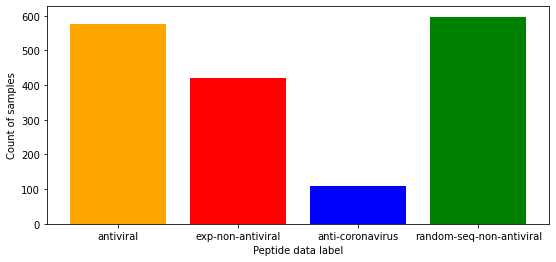

In [20]:
# visualization of different types
import matplotlib.pyplot as plt

antiviral = df['label'].value_counts()['antiviral']
expnonantiviral = df['label'].value_counts()['exp-non-antiviral']
anticoronavirus = df['label'].value_counts()['anti-coronavirus']
randomseqnonantiviral = df['label'].value_counts()['random-seq-non-antiviral']
xlabels = ['antiviral', 'exp-non-antiviral', 'anti-coronavirus','random-seq-non-antiviral']
ycounts = [antiviral, expnonantiviral, anticoronavirus, randomseqnonantiviral]
plt.figure(figsize=(9,4))
c = ['orange', 'red', 'blue', 'green']
plt.bar(xlabels,ycounts,color=c)
plt.xlabel('Peptide data label')
plt.ylabel('Count of samples')
plt.show()

In [21]:
from collections import Counter

def cnt(x,i):
  res = Counter(x)
  return res[i]

def colorApply(x):
    if(x=="antiviral"):
        return "orange"
    elif(x=="exp-non-antiviral"):
        return "red"
    elif(x=="anti-coronavirus"):
        return "blue"
    else:
        return "green"

In [22]:
# add count of each amino acid in the peptide sequence and length of peptide sequence
seq = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'X', 'B', 'Z' , 'J']
for i in seq:
  df[i] = df.sequence.apply(lambda x: cnt(x,i))

df['len'] = df.sequence.apply(lambda x: len(x))
df['color'] = df.label.apply(lambda x: colorApply(x))

df.to_csv("visualize_dataset.csv", index=False)
df

,sequence,label,A,C,D,E,F,G,H,I,...,T,V,W,Y,X,B,Z,J,len,color
0,DLGPPISLERLDVGTNLGNAIAKLEAKELLESSD,antiviral,3,0,3,4,0,3,0,2,...,1,1,0,0,0,0,0,0,34,orange
1,HRIDLGPPISLERLDVGTNLGNAIAKLEAKELLE,antiviral,3,0,2,4,0,3,1,3,...,1,1,0,0,0,0,0,0,34,orange
2,IDLGPPISLERLDVGTNLGNAIAKLEAKELLESS,antiviral,3,0,2,4,0,3,0,3,...,1,1,0,0,0,0,0,0,34,orange
3,LERLDVGTNLGNAIAKLEAKELLESSDQILRSMK,antiviral,3,0,2,4,0,2,0,2,...,1,1,0,0,0,0,0,0,34,orange
4,LGPPISLERLDVGTNLGNAIAKLEAKELLESSDQ,antiviral,3,0,2,4,0,3,0,2,...,1,1,0,0,0,0,0,0,34,orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,GRLQSLQTYVTQQLIRAAEIRASANLAATKMSEC,anti-coronavirus,6,1,0,2,0,1,0,2,...,3,1,0,1,0,0,0,0,34,blue
1699,KEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYVW,anti-coronavirus,1,0,2,5,0,1,0,3,...,0,2,3,3,0,0,0,0,37,blue
1700,LFGLIPSLIGGLVSAFK,anti-coronavirus,1,0,0,0,2,3,0,2,...,0,1,0,0,0,0,0,0,17,blue
1701,LFRLIKSLIKRLVSAFK,anti-coronavirus,1,0,0,0,2,0,0,2,...,0,1,0,0,0,0,0,0,17,blue


Text(0, 0.5, 'Length of Sequence')

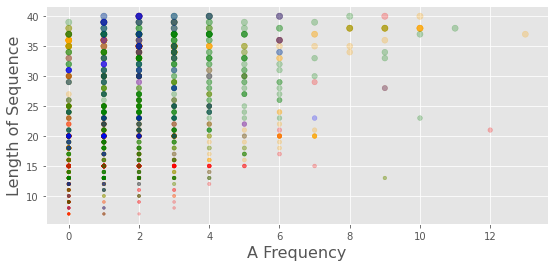

In [23]:
# Specifying the frequency of amino acid per length of peptide
charr = 'A'
plt.figure(figsize=(9,4))
plt.style.use('ggplot')
plt.scatter(x=df[charr], y=df['len'], s=df['len'],alpha=0.25,c=df['color'])
plt.xlabel(charr + " Frequency", size=16)
plt.ylabel("Length of Sequence", size=16)

Text(0, 0.5, 'Length of Sequence')

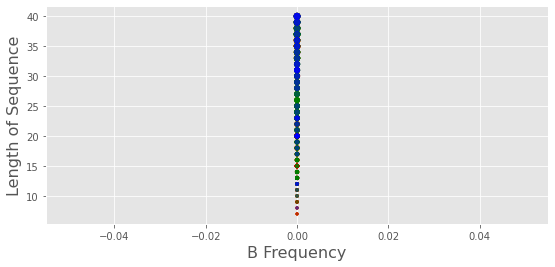

In [24]:
charr = 'B'
plt.figure(figsize=(9,4))
plt.style.use('ggplot')
plt.scatter(x=df[charr], y=df['len'], s=df['len'],alpha=0.25,c=df['color'])
plt.xlabel(charr + " Frequency", size=16)
plt.ylabel("Length of Sequence", size=16)

Text(0, 0.5, 'Length of Sequence')

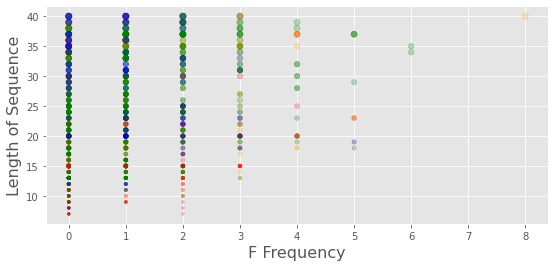

In [27]:
charr = 'F'
plt.figure(figsize=(9,4))
plt.style.use('ggplot')
plt.scatter(x=df[charr], y=df['len'], s=df['len'],alpha=0.25,c=df['color'])
plt.xlabel(charr + " Frequency", size=16)
plt.ylabel("Length of Sequence", size=16)

Text(0, 0.5, 'Length of Sequence')

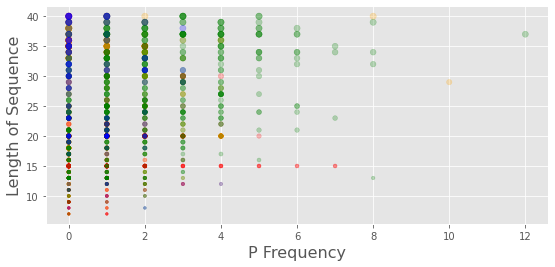

In [28]:
charr = 'P'
plt.figure(figsize=(9,4))
plt.style.use('ggplot')
plt.scatter(x=df[charr], y=df['len'], s=df['len'],alpha=0.25,c=df['color'])
plt.xlabel(charr + " Frequency", size=16)
plt.ylabel("Length of Sequence", size=16)

In [91]:
# add columns for percentage of each amino acid present in peptide sequence
seq = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'X', 'B', 'Z' , 'J']

for i in seq: 
    df["per"+i] = df.sequence.apply(lambda x: cnt(x,i)/len(x))

df.to_csv("visualize_dataset2.csv", index=False)
df["sequence"]


# df["sequence"].to_csv("sequence_only_file.csv", index=False)


0          DLGPPISLERLDVGTNLGNAIAKLEAKELLESSD
1          HRIDLGPPISLERLDVGTNLGNAIAKLEAKELLE
2          IDLGPPISLERLDVGTNLGNAIAKLEAKELLESS
3          LERLDVGTNLGNAIAKLEAKELLESSDQILRSMK
4          LGPPISLERLDVGTNLGNAIAKLEAKELLESSDQ
                        ...                  
1698       GRLQSLQTYVTQQLIRAAEIRASANLAATKMSEC
1699    KEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYVW
1700                        LFGLIPSLIGGLVSAFK
1701                        LFRLIKSLIKRLVSAFK
1702                              SLIGGLVSAFK
Name: sequence, Length: 1703, dtype: object

In [182]:
def avg_per(i, type, list):
    import csv
    sum = 0
    filename = 'visualize_dataset2.csv'
    row_no = 0
    peptide_cnt = 0
    with open(filename, 'r') as csvfile:
        data = csv.reader(csvfile)
        for row in data:
            if(row_no > 0):
                if(row[1] == type):
                    sum = sum + float(row[i])
                    peptide_cnt = peptide_cnt+1
            row_no = row_no+1
    avg=sum/peptide_cnt*100
    list.append(avg)
    return list

In [183]:
# calculating average amino acid percentage for all different types of data labels
antiviral_per_list = []
for i in range(28,48):
    antiviral_list = avg_per(i,'antiviral', antiviral_per_list)
print("antiviral_per_list")
print(antiviral_per_list)

expnonantiviral_per_list = []
for i in range(28,48):
    antiviral_list = avg_per(i,'exp-non-antiviral', expnonantiviral_per_list)
print("expnonantiviral_per_list")
print(expnonantiviral_per_list)

anticoronavirus_per_list = []
for i in range(28,48):
    antiviral_list = avg_per(i,'anti-coronavirus', anticoronavirus_per_list)
print("anticoronavirus_per_list")
print(anticoronavirus_per_list)

randomseqnonantiviral_per_list = []
for i in range(28,48):
    antiviral_list = avg_per(i,'random-seq-non-antiviral', randomseqnonantiviral_per_list)
print("randomseqnonantiviral_per_list")
print(randomseqnonantiviral_per_list)


antiviral_per_list
[7.389252286473775, 3.4903332986735625, 3.7409508006833008, 6.3867091522197, 3.832530214486094, 4.837255256891321, 1.3176789417733004, 7.05046872233581, 9.03174296286575, 12.176666455977186, 1.0792282996500604, 4.034836496280234, 3.3912105822581196, 3.7340187403232283, 8.06803018704244, 5.556945389645029, 3.332236930278312, 4.990305709608855, 4.4787430046337136, 2.0808565679003035]
expnonantiviral_per_list
[7.872026499760413, 3.3169808883318206, 4.198070799378846, 5.198177291670578, 3.6195644354635172, 5.9817503073414, 2.072867053539447, 4.69143205996145, 7.601280634296645, 9.072514254877483, 1.4641025813386048, 4.90687879876314, 5.468190406132902, 3.6623448694428045, 7.92304865653217, 5.63033730393533, 5.675326246957365, 6.342369874034043, 2.2232490695789324, 3.0794879686631145]
anticoronavirus_per_list
[6.22579731117816, 4.269144395684241, 3.691560865771002, 5.013004069098204, 4.416009963135925, 7.187685380034443, 1.4000436419679925, 7.338347004732275, 7.5665060465

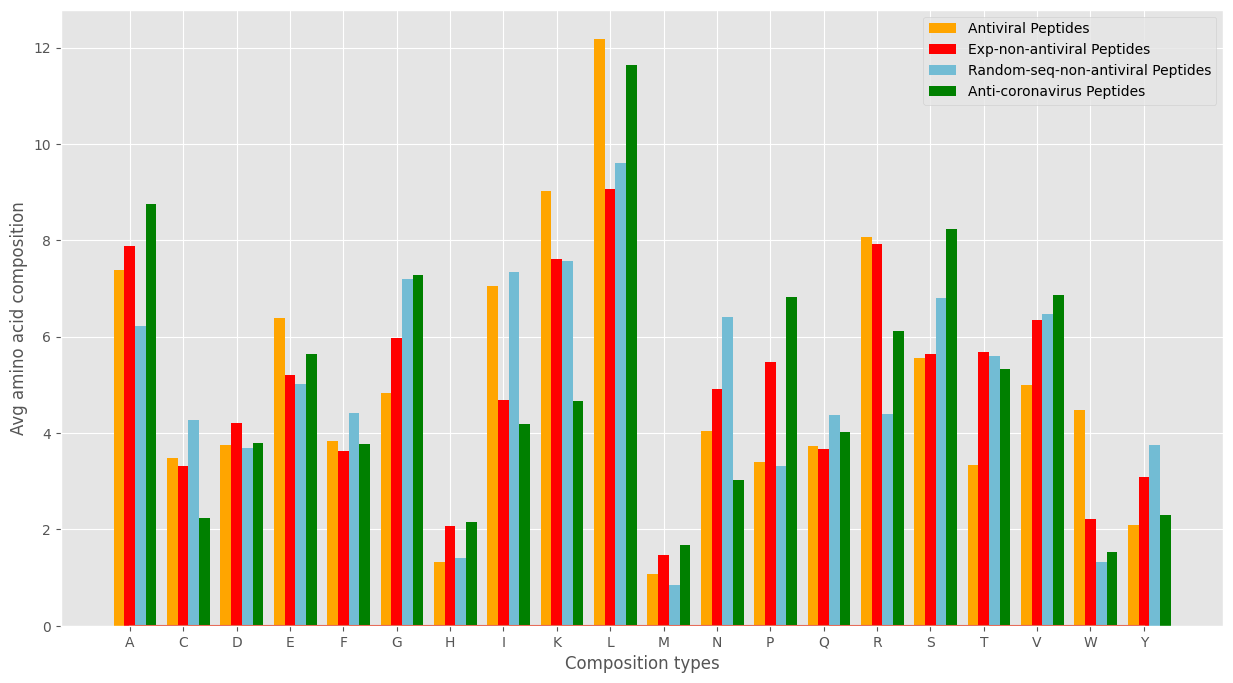

In [184]:
# For a particular amino acid specifying it's percentage of average amino acid composition
seq = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
types = ['Antiviral Peptides', 'Exp-non-antiviral Peptides', 'Random-seq-non-antiviral Peptides', 'Anti-coronavirus Peptides']

width = 0.2

initial = [0 for element in range(20)]

width_0 = [x - width for x in range (20)]
width_1 = [x for x in range (20)]
width_2 = [x + width for x in range (20)]
width_3 = [x + 2*width for x in range (20)]

plt.rcParams["figure.figsize"] = (15,8)
plt.plot(seq,initial)

plt.bar(width_0,antiviral_per_list,width, label = types[0],color='orange')
plt.bar(width_1,expnonantiviral_per_list,width, label = types[1],color='red')
plt.bar(width_2,anticoronavirus_per_list,width, label = types[2],color='#72bcd4')
plt.bar(width_3,randomseqnonantiviral_per_list,width, label = types[3],color='green')


plt.xlabel('Composition types')
plt.ylabel('Avg amino acid composition')
plt.legend()
plt.show()

In [32]:
# convert three-letter to one-letter amino acid symbols:

aa_3to1 = {'CYS': 'C', 'ASP': 'D', 'SER': 'S',
'GLN': 'Q', 'LYS':'K','ILE': 'I', 'PRO': 'P',
 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 'GLY': 'G',
 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W',
 'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}
 

In [33]:
import pandas as pd
nu_df = pd.read_csv('aa_freq.csv', sep=',',header=0)
# replace NA's with 0's
nu_df.fillna(0,inplace=True)

In [34]:
nu_df

,Overtone,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,Ala(A),60,222,235,268,331,417,492,560,635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cys(C),53,101,178,206,249,276,338,429,485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Asp(D),45,70,87,154,239,291,335,365,441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Glu(E),20,41,65,102,112,215,240,245,309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Phe(F),29,54,58,94,181,241,290,295,315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Gly(G),66,240,290,455,544,603,707,833,853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,His(H),27,74,80,127,219,276,309,323,343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Ile(I),52,59,82,149,216,224,256,277,290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Lys(K),43,61,63,86,135,150,187,227,243,...,3565.0,3745.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Leu(L),14,39,100,139,226,239,245,259,299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
from scipy.constants import speed_of_light as speedlight
nu = nu_df.values

In [36]:
for ro in range(nu.shape[0]):
    for co in range(nu.shape[1]):
        if co == 0:
            aa = nu[ro][co]
            aa = aa[0:3].upper()
            nu[ro][co]= aa_3to1[aa]
        else:
        # Convert from wavenumber to frequency
        # wavelength = 1/wavenumber
        # frequency = speed of light / wavelength
            if nu[ro][co] > 0:
                freq = speedlight / (1/nu[ro][co])

In [37]:
aa_list = nu[:,0]      # list of amino acids
nu = nu[:,1:]          # remove first column                
max_freq = nu.max()    # max and min 
min_freq = nu.min()    # need to exclude first column
human_range = 20000 - 20
for ro in range(nu.shape[0]):
    for co in range(nu.shape[1]):
        if nu[ro][co] > 0:
            # First scale to 0 to 1
            nu[ro][co] = (nu[ro][co] - min_freq)/ max_freq - min_freq
            # Scale to human hearing range 20 - 20000 Hz
            nu[ro][co] = (nu[ro][co] * human_range) + 20

In [38]:
def aa_note(aa,length):
    row = np.where(aa_list == aa)[0][0]
    print(row)
    wave = np.zeros(int(44100 * float(length)))
    harm = 0
 
    for freq in nu[row]:
        if freq == 0:
            break
        else:
            volume = np.exp(-harm)
            phases = np.cumsum(2.0 * np.pi * freq / 44100 * np.ones(int(44100 * float(length))))
            wave += np.sin(phases) * volume
            harm += 1
    # scale wave to values between 1 and -1
    wave = 2.*(wave - wave.min())/np.ptp(wave)-1
    return wave

In [39]:
from synthesizer import Player, Synthesizer
player = Player()
player.open_stream()

In [99]:
import pandas as pd


with open('sequence_only_file.csv', 'r') as f:
    content = f.readlines()

n = len(content)

label = [content[i].strip() for i in range(0,n,2)]
seq = [content[i].strip() for i in range(1,n,2)]

dfa = pd.DataFrame({'sequence':seq})
dfa.to_csv("Comnined_datasets_sequences.csv",index=False)



In [100]:
# Python program to read CSV file line by line
# import necessary packages
import csv
import numpy as np
import pandas as pd
all_melodies=[]

# df = pd.read_csv('Comnined_datasets_sequences.csv')    
# df



# Open file 
with open('Comnined_datasets_sequences.csv') as file_obj:
    # Create reader object by passing the file object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv file using reader object
    count = 0
    for row in reader_obj:
        if count==0:
            pass
        protein_sequence = str(row)
        unit_length = 0.5
        melodic_sequence = []
        for residue in protein_sequence:
            if residue!='[' and residue!="'" and residue!="]":
                sound_wave = aa_note(residue,unit_length)
                melodic_sequence = melodic_sequence + sound_wave.tolist()
        melody = np.asarray(melodic_sequence)
        melody = 2*(melody - melody.min())/np.ptp(melody)-1
        all_melodies.append(melody)
        count+=1
    

6
14
7
2
9
5
12
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
15
15
2
13
7
9
14
15
10
8
9
6
14
7
2
9
5
12
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
12
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
15
15
2
13
7
9
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
15
15
2
13
7
9
14
15
10
0
17
15
8
17
9
6
9
3
5
3
17
11
8
7
0
9
9
15
16
11
8
0
17
17
15
9
15
11
5
17
15
17
5
3
17
11
8
7
0
9
9
15
16
11
8
0
17
17
15
9
15
11
5
17
15
17
9
16
15
8
17
9
2
9
8
8
7
0
9
9
15
16
11
8
0
17
17
15
9
15
11
5
17
15
17
9
16
15
8
17
9
2
9
8
11
19
7
2
11
8
7
0
9
9
15
16
11
8
0
17
17
15
9
15
11
5
17
15
17
9
16
15
8
17
9
2
9
8
11
19
7
17
0
17
15
8
17
9
6
9
3
5
3
17
11
8
7
0
9
9
15
16
11
8
0
17
17
15
9
15
11
5
17
15
17
15
8
17
9
6
9
3
5
3
17
11
8
7
0
9
9
15
16
11
8
0
17
17
15
9
15
11
5
17
15
17
9
3
18
3
14
8
17
2
4
9
3
3
11
7
16
0
9
9
3
3
0
13
7
13
13
3
8
11
10
19
3
9
13
8
9
11
8
17
2
4
9
3
3
11
7
16
0
9
9
3
3

In [104]:
# print(len(all_melodies))
player.play_wave(all_melodies[850])

In [105]:
from os import path
from pydub import AudioSegment

/home/treav/.local/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [110]:
# converting all music into wav format

from __future__ import print_function
import scipy.io.wavfile as wavf
import numpy as np
i=0
fs = 441
for melody in all_melodies:
    out_f = 'melodies/'+str(i)+'.wav'
    wavf.write(out_f, fs, all_melodies[i])
    i=i+1

In [5]:
# Load imports
import tensorflow as tf
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import os

In [ ]:
# Class: antiviral

filename = 'melodies/0.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename, duration=7)
_ = librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)


